# (Practice) Visualizing Time Series

In [1]:
import pandas as pd
import datetime as dt


In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
## displaying random sample
df['date'].sample(n=10).sort_index()

153      19790603
519      19800603
1221     19820506
1626     19830615
2576     19860120
3575     19881015
7131     19980711
9068     20031030
9169     20040208
11088    20090511
Name: date, dtype: int64

In [5]:
pd.to_datetime(df['date'], format='%Y%m%d')

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [6]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [7]:
df = df.set_index('datetime')

In [8]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [9]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                       'max_temp', 'snow_depth']]

In [10]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

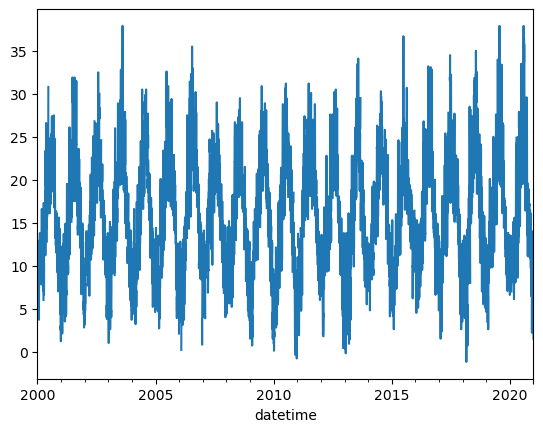

In [11]:
import matplotlib.pyplot as plt
ax = df['max_temp'].plot()

In [12]:
plt.rcParams['figure.figsize']


[6.4, 4.8]

In [13]:
plt.rcParams['figure.figsize'] = (12,5)

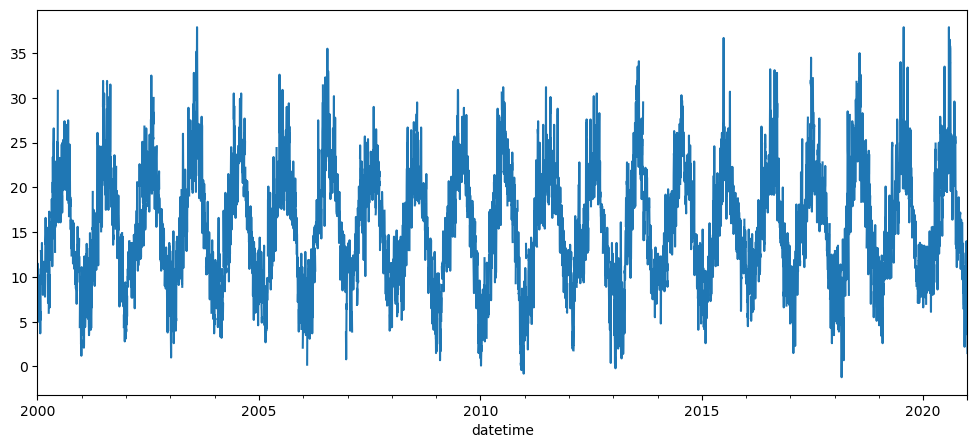

In [14]:
ax = df['max_temp'].plot()

In [15]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [16]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [17]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [18]:
df.isna().sum()


precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

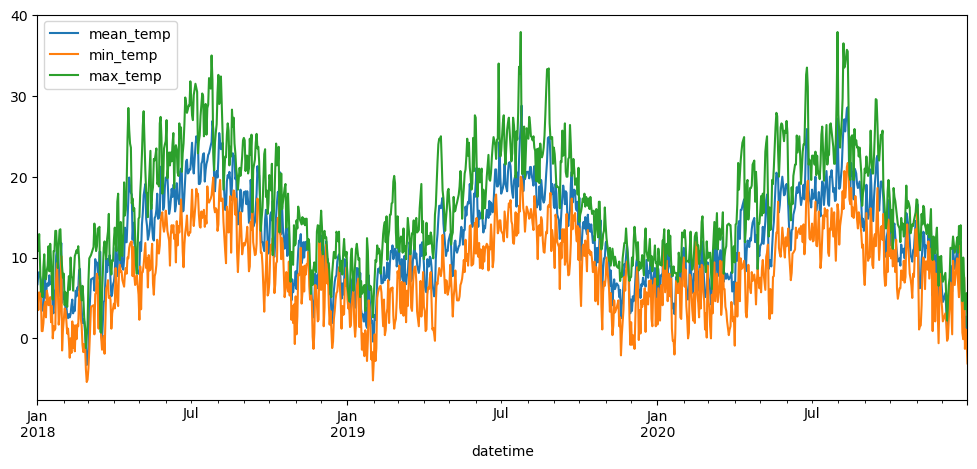

In [27]:
temp_cols = ['mean_temp','min_temp','max_temp']
df_viz=df.loc['2018':,temp_cols]
ax = df_viz.plot();

In [28]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

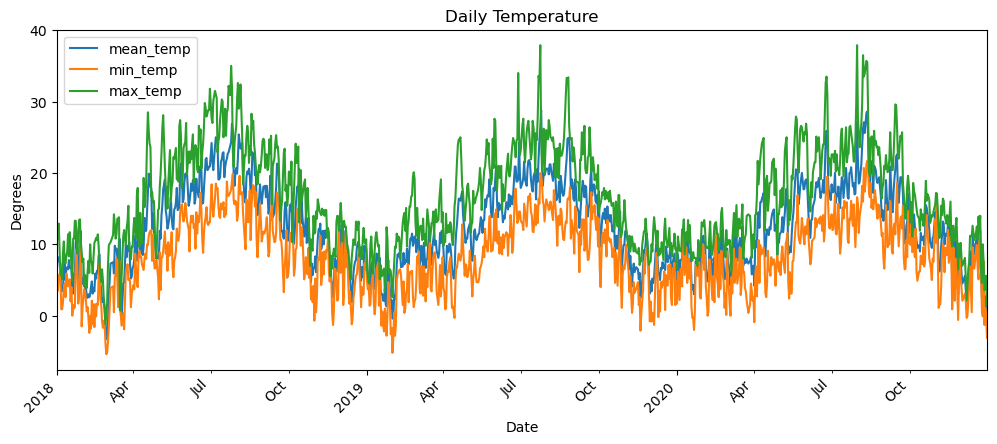

In [31]:
## Plot the data
ax = df_viz.plot(figsize=(12,5))
ax.set(title='Daily Temperature', ylabel='Degrees', xlabel="Date")

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='minor',rotation=45)
fig.autofmt_xdate(which='major',rotation=45)

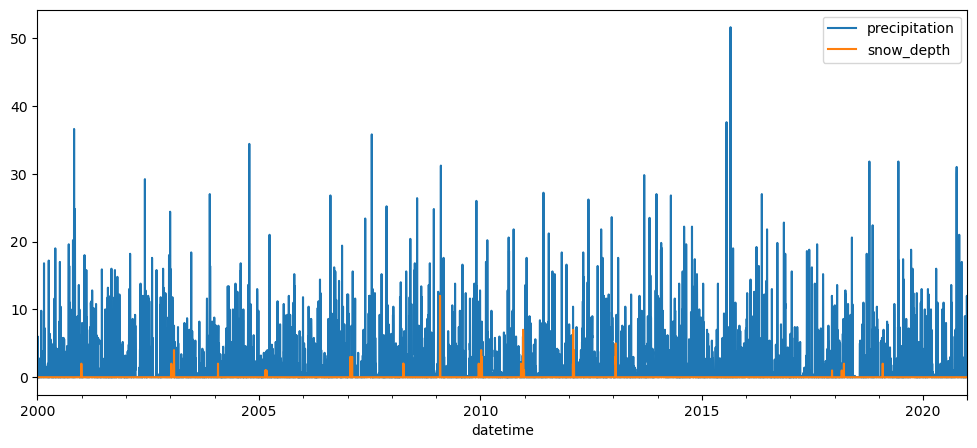

In [32]:
precip_cols = ['precipitation','snow_depth']
df_prec=df.loc['2000':,precip_cols]
ax = df_prec .plot();



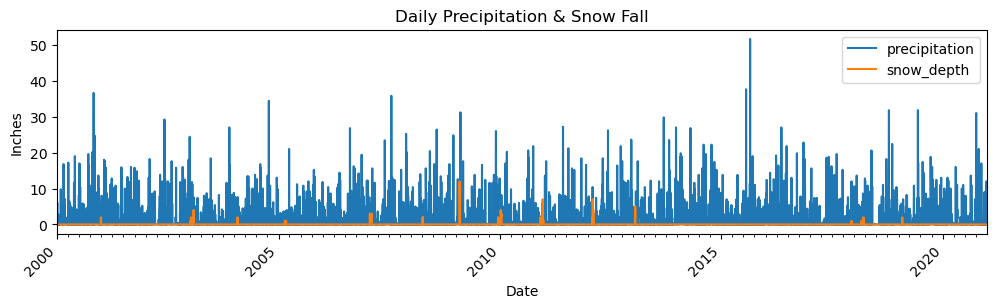

In [33]:
## Plot the data
ax = df_prec.plot(figsize=(12,3))
ax.set(title='Daily Precipitation & Snow Fall', ylabel='Inches', xlabel="Date")

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
#minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
#ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='minor',rotation=45)
fig.autofmt_xdate(which='major',rotation=45)